**Decision Tree of Iris Flower Types**

Bu projede, Karar Ağacı (Decision Tree) Sınıflandırıcısı kullanarak Iris çiçeği türleri sınıflandırması yapılmıştır. Karar ağacı, veriyi özellik değerlerine göre alt gruplara ayırarak sınıflandırma yapan, yaygın olarak kullanılan bir makine öğrenmesi algoritmasıdır. Karar ağaçları basit ve yorumlanabilir olmasına rağmen, modelin performansı ağacın derinliği, düğüm bölme için gereken minimum örnek sayısı ve bölme kriteri gibi hiperparametrelere bağlı olarak değişebilir.

Karar ağacının performansını iyileştirmek için Grid Search Cross-Validation (GridSearchCV) yöntemini kullanılmıştır. Grid search, farklı hiperparametre kombinasyonlarını sistematik bir şekilde test ederek en iyi modelin bulunmasını sağlar. Bu süreç, karar ağacının parametrelerini ayarlayarak, test verisi üzerinde en iyi doğruluğu elde etmemizi sağlar.


In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


**Iris veri seti**, 150 örnekten oluşur ve her örnek 4 özellik içerir. Bu özellikler, çiçeklerin fiziksel özellikleri olup, her biri üç farklı türde (Setosa, Versicolor, Virginica) sınıflandırılmıştır.

In [2]:
df=pd.read_csv("/kaggle/input/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
X=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y=df["Species"]

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

**Decision Tree (Karar Ağacı)** algoritması, denetimli öğrenme yöntemlerinden biridir ve sınıflandırma ve regresyon problemlerinde yaygın olarak kullanılır. Karar ağacı, veriyi çeşitli özellikler aracılığıyla böler ve her bölme, verinin daha homojen gruplara ayrılmasını sağlar. Ağacın her bir dalı bir karar kriterine dayanır ve nihayetinde sınıfları (sınıflandırma problemlerinde) veya değerleri (regresyon problemlerinde) tahmin eden yapraklara ulaşılır. 
Karar ağacının bazı önemli parametreleri şunlardır: 

* **criterion:** Bölme kriterini belirler. Sınıflandırma için genellikle "gini" (Gini Impurity) veya "entropy" (Information Gain) kullanılır.
Regresyon problemlerinde ise "mse" (Mean Squared Error) veya "mae" (Mean Absolute Error) tercih edilebilir.

* **max_depth:** Karar ağacının maksimum derinliğini belirler. Derinlik, ağacın ne kadar bölüneceğini ve modelin karmaşıklığını etkiler. Aşırı uyum (overfitting) engellemek için derinlik sınırlanabilir.

* **min_samples_split:** Bir düğümün iki alt düğüme bölünebilmesi için gereken minimum örnek sayısını belirler. Bu parametre, ağacın fazla büyümesini ve aşırı uyumu engellemeye yardımcı olabilir.


* **min_samples_leaf:** Bir yaprak düğümde bulunması gereken minimum örnek sayısını belirtir. Bu parametre, ağacın yaprak düğümlerinde çok az örnek olmasını engeller ve modelin daha genellenebilir olmasını sağlar.

  
* **max_features:** Bölme için kullanılacak maksimum özellik sayısını belirler. Karar ağacının her bölme sırasında sadece belirli sayıda özelliği göz önünde bulundurmasını sağlar, bu da hesaplama maliyetlerini azaltabilir ve aşırı uyumu engelleyebilir.



**Grid Search,** bir modelin hiperparametrelerini optimize etmek için kullanılan bir tekniktir. Bu yöntem, kullanıcı tarafından belirtilen hiperparametreler için tüm olası kombinasyonları denemek ve her kombinasyon için modelin performansını ölçmek amacıyla kullanılır. GridSearchCV (çapraz doğrulama ile Grid Search), belirli bir parametre ızgarası üzerinde en iyi modelin seçilmesini sağlar. Grid Search ile, örneğin karar ağacındaki farklı criterion, max_depth, min_samples_split ve diğer parametrelerin farklı kombinasyonları denenerek en iyi performansı veren parametre seti bulunur. Bu yöntem, modelin daha iyi genelleme yapabilmesi için uygun hiperparametrelerin seçilmesinde faydalıdır ve genellikle modelin doğruluğunu artırır.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
model=DecisionTreeClassifier(random_state=42)

param_grid={
    "criterion": ["gini","entropy"],
    "max_depth": [3,5,10,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf":[1,2,4],
    "max_features":['auto', 'sqrt', 'log2', None]
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nBest param:",grid_search.best_params_)


Accuracy: 1.0

Best param: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


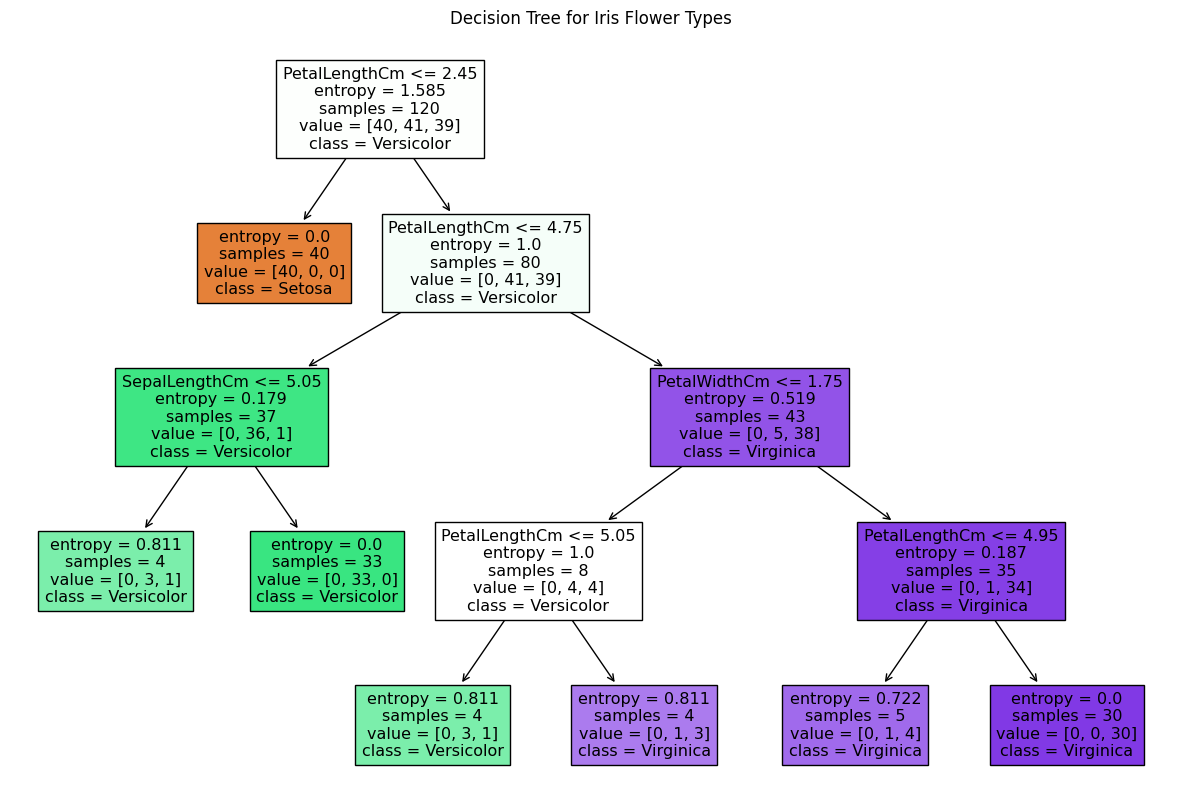

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Setosa', 'Versicolor', 'Virginica'])
plt.title("Decision Tree for Iris Flower Types")
plt.show()